# Generate Clusters

In [1]:
# standard imports
import numpy as np
import os

# plotting tools
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

# data management
import pandas as pd

# ipython reload capabilities for edits to external code
%load_ext autoreload
%autoreload 2


## Part 1: Hitters

In [2]:
import hittingpredictor as hp

In [3]:

# which years are we interested in querying?
years = range(2019-3, 2019+1)


year_dfs = []

for year in years:

    df = hp.scrape_year(year=year,cat='bat',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    



In [4]:
nclusters = 12

year_df,df,stereotype_df,hitter_cluster_centroid_df,transform = hp.compute_cluster(all_year_data,years,nclusters,min_pas=150,verbose=0)



In [37]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor = 0.65
err_regression_factor = 1.2



In [45]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Christian Yelich']

print('Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj')

for pl in pls:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=1,return_stats=True)

    

Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj
Christian Yelich, 33.13, 5.95, 126.97, 9.29, 517.86, 12.42, 19.21, 4.81, 92.26, 8.65, 97.93, 8.59, 600, 1.0, 


In [31]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor = 0.65
err_regression_factor = 1.2




In [36]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Mike Trout']

print('Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj')

for pl in pls:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=1,return_stats=True)

    

Player, HR, eHR, H, eH, AB, eAB, SB, eSB, RBI, eRBI, R, eR, PA, Adj
Mike Trout, 36.58, 12.43, 105.21, 12.47, 480.01, 34.77, 15.88, 11.12, 88.91, 12.85, 102.38, 11.03, 600, 1.0, 


## Part 2: Pitchers

In [47]:
import pitchingpredictor as pp

In [48]:

# which years are we interested in querying?
years = range(2019-2, 2019+1)


year_dfs = []

for year in years:

    df = pp.scrape_year(year=year,cat='pit',verbose=0)
    year_dfs.append(df)

# concatenate results from all years
all_year_data = year_dfs[0]
for year in year_dfs[1:]:
    all_year_data = pd.concat([all_year_data, year])
    




In [49]:
nclusters = 12

year_df,df,stereotype_df,cluster_centroid_df,transform = pp.compute_cluster_pitching(all_year_data,years,nclusters,min_ip=10,verbose=0)




In [50]:
# new tunings for pitchers...
year_weights = {}
year_weights[2017.0] = 0.12
year_weights[2018.0] = 0.33
year_weights[2019.0] = 0.55
print(year_weights)

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = -0.05


regression_factor = 0.8
err_regression_factor = 1.5




{2017.0: 0.12, 2018.0: 0.33, 2019.0: 0.55}


In [54]:

# if you'd like to do them all...
arr = np.array(list(df['Name']))
pls = np.unique(arr)

pls = ['Max Scherzer']

print('Player, HR, eHR, ER, eER, BB, eBB, H, eH, SO, eSO, IP, Adj')

for pl in pls:
    S = pp.generate_player_prediction(pl,df,cluster_centroid_df,\
                               estimated_ips=200,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=0,return_stats=True)

    
    


Player, HR, eHR, ER, eER, BB, eBB, H, eH, SO, eSO, IP, Adj
Max Scherzer, 21.1, 0.73, 61.04, 6.62, 45.91, 22.02, 129.46, 26.55, 270.29, 53.04, 200, 1.0, 
HR
ER
BB
H
SO


In [55]:
print(S)

{'HR': 21.1, 'eHR': 0.73, 'ER': 61.04, 'eER': 6.62, 'BB': 45.91, 'eBB': 22.02, 'H': 129.46, 'eH': 26.55, 'SO': 270.29, 'eSO': 53.04}


In [12]:
import pandas as pd

link='https://baseballsavant.mlb.com/statcast_search/csv?hfPT=&hfAB=&hfBBT=&hfPR=&hfZ=&stadium=&hfBBL=&hfNewZones=&hfGT=R%7C&hfC=&hfSea=2019%7C&hfSit=&player_type=batter&hfOuts=&opponent=&pitcher_throws=&batter_stands=&hfSA=&game_date_gt=&game_date_lt=&hfInfield=&team=&position=&hfOutfield=&hfRO=&home_road=&hfFlag=&hfPull=&metric_1=&hfInn=&min_pitches=0&min_results=0&group_by=name&sort_col=pitches&player_event_sort=h_launch_speed&sort_order=desc&min_pas=0#results'
df_all = pd.read_csv(link, low_memory=False)

In [13]:
df_all

,pitches,player_id,player_name,total_pitches,pitch_percent,ba,iso,babip,slg,woba,...,takes,eff_min_vel,release_extension,pos3_int_start_distance,pos4_int_start_distance,pos5_int_start_distance,pos6_int_start_distance,pos7_int_start_distance,pos8_int_start_distance,pos9_int_start_distance
0,3223,656555,Rhys Hoskins,3223,100.0,0.226,0.228,0.267,0.454,0.351,...,1948,-0.3,6.04,108.0,152.0,118.0,145.0,302.0,328.0,300.0
1,3048,660670,Ronald Acuna Jr.,3048,100.0,0.280,0.238,0.337,0.518,0.373,...,1652,-0.2,6.01,109.0,153.0,116.0,146.0,313.0,328.0,296.0
2,2965,543760,Marcus Semien,2965,100.0,0.285,0.237,0.294,0.522,0.377,...,1713,-0.4,5.95,108.0,152.0,115.0,145.0,301.0,321.0,291.0
3,2915,608324,Alex Bregman,2915,100.0,0.296,0.296,0.281,0.592,0.423,...,1883,-0.5,5.98,106.0,151.0,119.0,145.0,296.0,326.0,292.0
4,2909,605141,Mookie Betts,2909,100.0,0.295,0.229,0.309,0.524,0.384,...,1790,-0.4,6.00,107.0,152.0,119.0,145.0,293.0,327.0,300.0
5,2888,502671,Paul Goldschmidt,2888,100.0,0.260,0.216,0.303,0.476,0.350,...,1544,-0.3,6.02,108.0,151.0,120.0,146.0,311.0,328.0,301.0
6,2862,593428,Xander Bogaerts,2862,100.0,0.309,0.246,0.338,0.555,0.394,...,1684,-0.4,6.01,107.0,152.0,119.0,146.0,293.0,326.0,298.0
7,2843,542340,Jonathan Villar,2843,100.0,0.274,0.179,0.341,0.453,0.339,...,1423,-0.3,6.02,108.0,148.0,104.0,148.0,292.0,320.0,297.0
8,2805,656305,Matt Chapman,2805,100.0,0.249,0.257,0.270,0.506,0.359,...,1617,-0.4,5.95,106.0,151.0,119.0,145.0,304.0,325.0,297.0
9,2793,467793,Carlos Santana,2793,100.0,0.281,0.234,0.293,0.515,0.384,...,1688,-0.4,5.98,113.0,159.0,124.0,148.0,295.0,324.0,300.0


# Part 3: Hitting Analysis

In [6]:
reviews = ['Ronald Acuna Jr.',\
          'Justin Upton',\
          'George Springer',\
          'Lorenzo Cain',\
          'Adam Jones',\
          'Tommy Pham',\
          'Dee Gordon',\
          'Eddie Rosario',\
          'Cody Bellinger',\
          'Jackie Bradley Jr.',\
          'Chad Pinder',\
          'Juan Soto',\
          'Max Kepler',\
          'Jeff McNeil',\
          'Willie Calhoun',\
          'Nomar Mazara',\
          'Michael Brantley',\
          'Alex Verdugo',\
          'Marcell Ozuna',\
          'David Dahl',\
          'Bryan Reynolds',\
          'Victor Robles',\
          'Christian Yelich',\
          'Jesse Winker',\
          'Ramon Laureano',\
          'Leury Garcia',\
          'Hunter Renfroe',\
          'Aaron Judge',\
          'Kevin Pillar',\
          'Ketel Marte',\
          'Starling Marte',\
          'Jorge Soler',\
          'Austin Meadows',\
          'Cameron Maybin',\
          'Tommy Edman',\
          'Adam Eaton',\
          'Josh Reddick',\
          'J.D. Martinez',\
          'Shin-Soo Choo']

Ronald Acuna Jr., 26.39, 6.95, 101.4, 8.8, 445.78, 19.47, 17.66, 16.32, 70.15, 1.69, 84.45, 8.48, 600, 1.0, 
Justin Upton, 28.45, 2.71, 92.48, 11.21, 519.01, 4.28, 4.9, 3.91, 85.92, 13.94, 78.39, 6.07, 600, 1.0, 
George Springer, 31.55, 3.87, 111.68, 4.56, 523.56, 13.55, 6.22, 3.37, 87.32, 1.79, 94.94, 22.08, 600, 1.0, 
Lorenzo Cain, 10.54, 1.99, 136.5, 11.63, 537.15, 9.15, 26.27, 15.78, 45.32, 4.81, 79.76, 9.25, 600, 1.0, 
Adam Jones, 18.3, 6.11, 133.32, 2.98, 556.55, 5.05, 5.1, 4.41, 72.38, 9.75, 69.09, 9.24, 600, 1.0, 
Tommy Pham, 19.7, 7.08, 119.95, 8.53, 520.05, 6.23, 15.24, 14.99, 64.59, 8.55, 82.92, 15.23, 600, 1.0, 
Dee Gordon, 6.47, 9.07, 148.2, 8.6, 560.67, 8.99, 27.51, 22.88, 46.82, 19.79, 64.98, 15.64, 600, 1.0, 
Eddie Rosario, 26.02, 7.2, 131.98, 3.55, 561.05, 23.99, 6.28, 2.85, 89.06, 15.27, 86.02, 14.78, 600, 1.0, 
Cody Bellinger, 30.21, 9.13, 103.0, 2.18, 477.18, 6.87, 10.87, 4.87, 82.08, 11.7, 87.11, 10.11, 600, 1.0, 
Jackie Bradley Jr., 20.97, 5.81, 102.44, 6.88, 525.

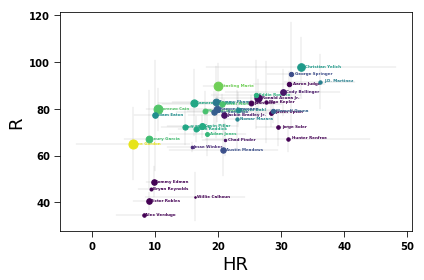

In [7]:

for pl in reviews:
    S = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor,err_regression_factor=err_regression_factor,\
                               AgeDict={},verbose=0,return_stats=True)
    plt.plot([S['HR'],S['HR']],[S['R']-S['eR'],S['R']+S['eR']],color='gray',lw=0.2)
    plt.plot([S['HR']-S['eHR'],S['HR']+S['eHR']],[S['R'],S['R']],color='gray',lw=0.2)
    plt.scatter(S['HR'],S['R'],color=cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S['HR'],S['R'],pl,size=4,color=cm.viridis((S['H']-100.)/50.,1.))

    
plt.xlabel('HR',size=18)
plt.ylabel('R',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

In [18]:
# this cell is where the magic happens:
# choose all the prefactors

# weights to consider for each year
year_weights = {}
year_weights[2016.0] = 0.075
year_weights[2017.0] = 0.075
year_weights[2018.0] = 0.35
year_weights[2019.0] = 0.5

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor1 = 0.65
err_regression_factor1 = 1.2

# how aggresively to bring players back to the cluster center
regression_factor2 = 0.15
err_regression_factor2 = 1.2





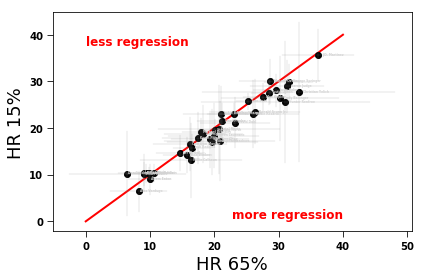

In [24]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor2,err_regression_factor=err_regression_factor2,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['HR'],S1['HR']],[S2['HR']-S2['eHR'],S2['HR']+S2['eHR']],color='gray',lw=0.2)
    plt.plot([S1['HR']-S1['eHR'],S1['HR']+S1['eHR']],[S2['HR'],S2['HR']],color='gray',lw=0.2)
    plt.scatter(S1['HR'],S2['HR'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['HR'],S2['HR'],pl,size=3,color='lightgray')

    
nmax = 40.


plt.text(0.,nmax,'less regression',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'more regression',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)
plt.xlabel('HR 65%',size=18)
plt.ylabel('HR 15%',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

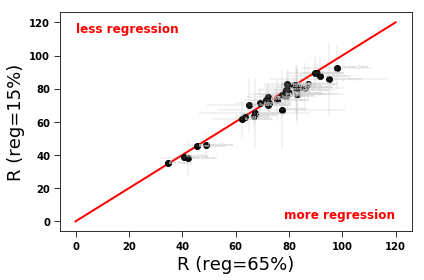

In [25]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor2,err_regression_factor=err_regression_factor2,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['R'],S1['R']],[S2['R']-S2['eR'],S2['R']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['R']-S1['eR'],S1['R']+S1['eR']],[S2['R'],S2['R']],color='gray',lw=0.2)
    plt.scatter(S1['R'],S2['R'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['R'],S2['R'],pl,size=3,color='lightgray')

    
nmax = 120.


plt.text(0.,nmax,'less regression',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'more regression',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.xlabel('R (reg=65%)',size=18)
plt.ylabel('R (reg=15%)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

In [27]:
# weights to consider for each year
year_weights1 = {}
year_weights1[2016.0] = 0.1
year_weights1[2017.0] = 0.1
year_weights1[2018.0] = 0.4
year_weights1[2019.0] = 0.4

year_weights2 = {}
year_weights2[2016.0] = 0.075
year_weights2[2017.0] = 0.075
year_weights2[2018.0] = 0.15
year_weights2[2019.0] = 0.75

# penalty if missing
year_weights_penalty = {}
year_weights_penalty[2016.0] = 0.00
year_weights_penalty[2017.0] = 0.00
year_weights_penalty[2018.0] = 0.05
year_weights_penalty[2019.0] = 0.05

# how aggresively to bring players back to the cluster center
regression_factor1 = 0.65
err_regression_factor1 = 1.2



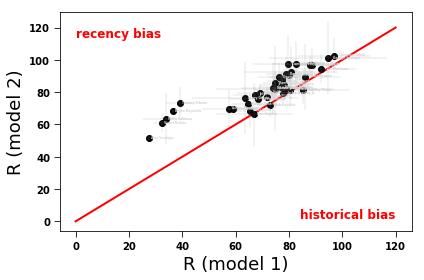

In [28]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights2,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['R'],S1['R']],[S2['R']-S2['eR'],S2['R']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['R']-S1['eR'],S1['R']+S1['eR']],[S2['R'],S2['R']],color='gray',lw=0.2)
    plt.scatter(S1['R'],S2['R'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['R'],S2['R'],pl,size=3,color='lightgray')

    
nmax = 120.


plt.text(0.,nmax,'recency bias',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'historical bias',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.xlabel('R (model 1)',size=18)
plt.ylabel('R (model 2)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')

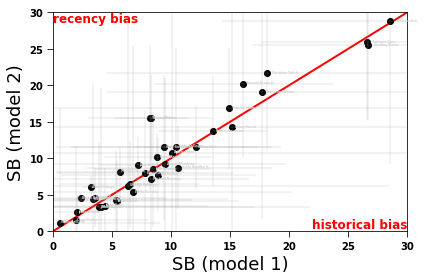

In [30]:

for pl in reviews:
    S1 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights1,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)
    S2 = hp.generate_player_prediction(pl,df,hitter_cluster_centroid_df,\
                               estimated_pas=600,\
                               year_weights=year_weights2,\
                               year_weights_penalty=year_weights_penalty,\
                               regression_factor=regression_factor1,err_regression_factor=err_regression_factor1,\
                               AgeDict={},verbose=0,return_stats=True)    
    plt.plot([S1['SB'],S1['SB']],[S2['SB']-S2['eR'],S2['SB']+S2['eR']],color='gray',lw=0.2)
    plt.plot([S1['SB']-S1['eR'],S1['SB']+S1['eR']],[S2['SB'],S2['SB']],color='gray',lw=0.2)
    plt.scatter(S1['SB'],S2['SB'],color='black')#cm.viridis((S['H']-100.)/50.,1.),s=3.*S['SB'],zorder=100)

    plt.text(1.02*S1['SB'],S2['SB'],pl,size=3,color='lightgray')

    
nmax = 30.


plt.text(0.,nmax,'recency bias',color='red',size=12,ha='left',va='top')
plt.text(nmax,0.,'historical bias',color='red',size=12,ha='right',va='bottom')


plt.plot([0.,nmax],[0.,nmax],color='red',zorder=-9)

plt.axis([0.,nmax,0.,nmax])

plt.xlabel('SB (model 1)',size=18)
plt.ylabel('SB (model 2)',size=18)
plt.tight_layout()
plt.savefig('reviewered.png')